<ipython-input-7-1c418148537e>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


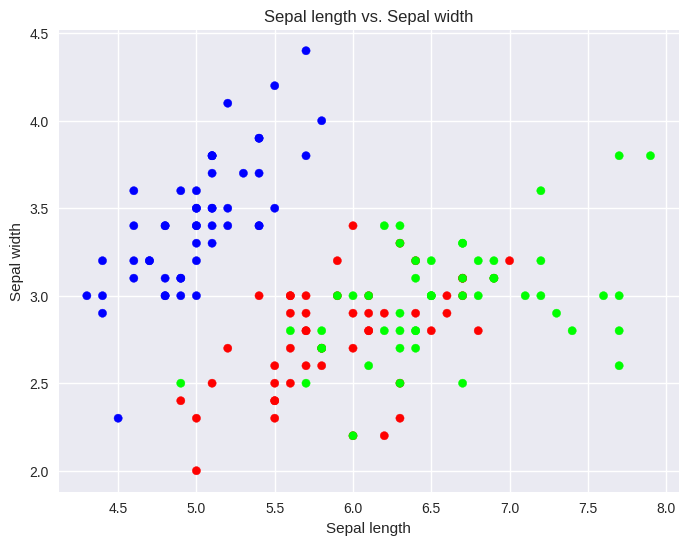

array([0.72962445, 0.22850762])

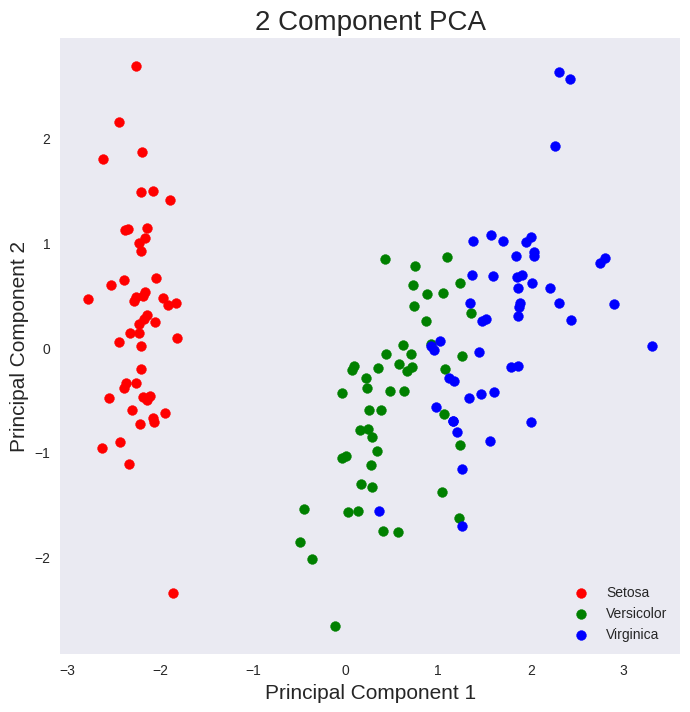

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
plt.style.use('seaborn')

dataset=pd.read_csv("iris.csv")
dataset.head()

XX=dataset.iloc[:,:-1]
yy=dataset.iloc[:,-1]
XX.head()

from sklearn.datasets import load_iris
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='FlowerType')
y.head()

plt.figure(4, figsize=(8, 6))
plt.clf()
# Plot the training points
plt.scatter(XX['sepal.length'], XX['sepal.width'], s=35, c=y, cmap=plt.cm.brg)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Sepal length vs. Sepal width')
plt.show()

features = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
x = dataset.loc[:, features].values

y = dataset.loc[:,['variety']].values

x = StandardScaler().fit_transform(x)

pd.DataFrame(data = x, columns = features).head()

#PCA Projection to 2D
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf.head(5)

dataset[['variety']].head()

finalDf = pd.concat([principalDf, dataset[['variety']]], axis = 1)
finalDf.head(5)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['Setosa', 'Versicolor', 'Virginica']
colors = ['r', 'g', 'b']
for variety, color in zip(targets,colors):
    indicesToKeep = finalDf['variety'] == variety
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


#Explained Variance:The explained variance tells us how much information (variance)
#can be attributed to each of the principal components.
pca.explained_variance_ratio_



#from sklearn.datasets import load_iris
#iris = load_iris()
#X = pd.DataFrame(iris.data, columns=iris.feature_names)
#y = pd.Series(iris.target, name='FlowerType')
#X.head()